In [1]:
from pathlib import Path
import pydicom
import matplotlib.pyplot as plt


In [2]:
dicom_file = pydicom.read_file("ID_0000_AGE_0060_CONTRAST_1_CT.dcm")


In [3]:
print(dicom_file)


Dataset.file_meta -------------------------------
(0002, 0000) File Meta Information Group Length  UL: 194
(0002, 0001) File Meta Information Version       OB: b'\x00\x01'
(0002, 0002) Media Storage SOP Class UID         UI: CT Image Storage
(0002, 0003) Media Storage SOP Instance UID      UI: 1.3.6.1.4.1.14519.5.2.1.7777.9002.108821836759549281694712274169
(0002, 0010) Transfer Syntax UID                 UI: Implicit VR Little Endian
(0002, 0012) Implementation Class UID            UI: 1.2.40.0.13.1.1.1
(0002, 0013) Implementation Version Name         SH: 'dcm4che-1.4.31'
-------------------------------------------------
(0008, 0000) Group Length                        UL: 430
(0008, 0005) Specific Character Set              CS: 'ISO_IR 100'
(0008, 0008) Image Type                          CS: ['ORIGINAL', 'PRIMARY', 'AXIAL']
(0008, 0016) SOP Class UID                       UI: CT Image Storage
(0008, 0018) SOP Instance UID                    UI: 1.3.6.1.4.1.14519.5.2.1.7777.9002.1088

In [4]:
dicom_file[0x0028, 0x0010]


(0028, 0010) Rows                                US: 512

In [5]:
dicom_file.Rows


512

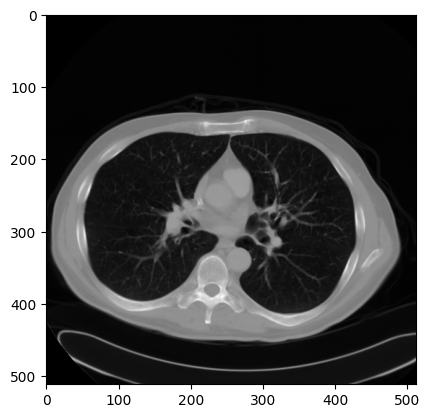

In [7]:
ct = dicom_file.pixel_array
plt.figure()
plt.imshow(ct, cmap="gray")


In [8]:
path_to_head_mri = Path("SE000001/")

In [9]:
all_files = list(path_to_head_mri.glob("*"))


In [10]:
all_files


[PosixPath('SE000001/MR000016'),
 PosixPath('SE000001/MR000012'),
 PosixPath('SE000001/MR000024'),
 PosixPath('SE000001/MR000008'),
 PosixPath('SE000001/MR000017'),
 PosixPath('SE000001/MR000019'),
 PosixPath('SE000001/MR000000'),
 PosixPath('SE000001/MR000015'),
 PosixPath('SE000001/MR000006'),
 PosixPath('SE000001/MR000002'),
 PosixPath('SE000001/MR000011'),
 PosixPath('SE000001/MR000020'),
 PosixPath('SE000001/MR000007'),
 PosixPath('SE000001/MR000014'),
 PosixPath('SE000001/MR000001'),
 PosixPath('SE000001/MR000025'),
 PosixPath('SE000001/MR000021'),
 PosixPath('SE000001/MR000022'),
 PosixPath('SE000001/MR000026'),
 PosixPath('SE000001/MR000010'),
 PosixPath('SE000001/MR000023'),
 PosixPath('SE000001/MR000003'),
 PosixPath('SE000001/MR000004'),
 PosixPath('SE000001/MR000005'),
 PosixPath('SE000001/MR000018'),
 PosixPath('SE000001/MR000013'),
 PosixPath('SE000001/MR000009')]

In [11]:
mri_data = []

for path in all_files:
    data = pydicom.read_file(path)
    mri_data.append(data)


In [13]:
for slice in mri_data[:5]:
    print(slice.SliceLocation)


95.9999960937442
71.9999961590453
143.999998928727
47.9999970362677
101.999994745866


In [14]:
mri_data_ordered = sorted(mri_data, key=lambda slice: slice.SliceLocation)
for slice in mri_data_ordered[:5]:
    print(slice.SliceLocation)


0.0
5.99999663091323
11.9999973042441
17.9999979772582
23.9999946081714


In [15]:
full_volume = []
for slice in mri_data_ordered:
    full_volume.append(slice.pixel_array)


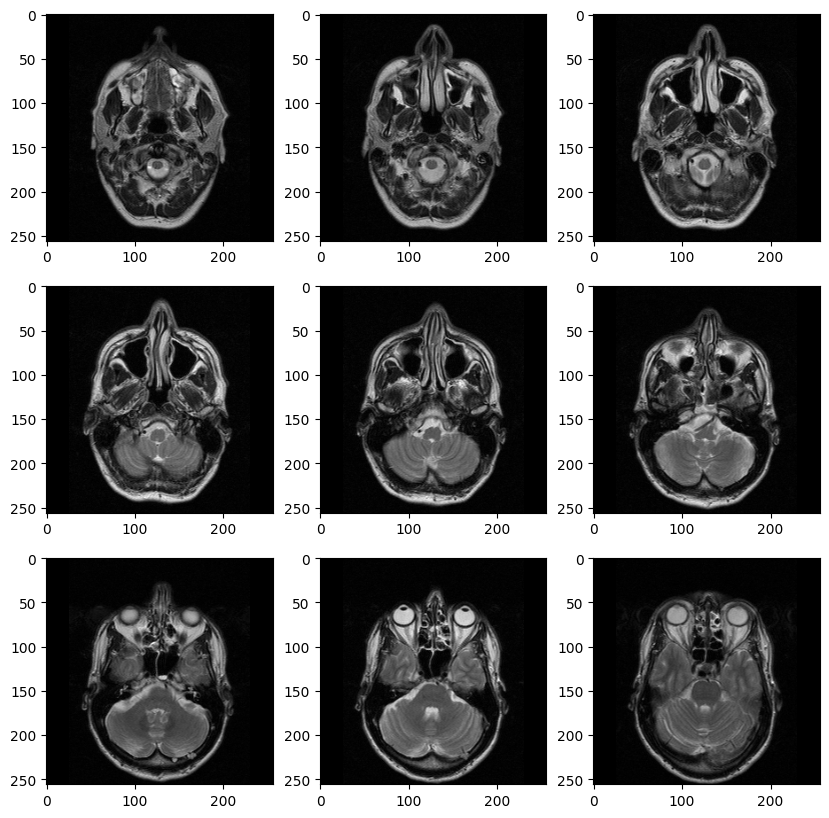

In [16]:
fig, axis = plt.subplots(3, 3, figsize=(10, 10))

slice_counter = 0
for i in range(3):
    for j in range(3):
        axis[i][j].imshow(full_volume[slice_counter], cmap="gray")
        slice_counter+=1


In [18]:
import SimpleITK as sitk


In [19]:
series_ids = sitk.ImageSeriesReader.GetGDCMSeriesIDs(str(path_to_head_mri))
print(series_ids)


('1.3.46.670589.11.0.0.11.4.2.0.12098.5.4500.2015011413262801702',)


In [20]:
series_file_names = sitk.ImageSeriesReader.GetGDCMSeriesFileNames(str(path_to_head_mri))
print(series_file_names)


('SE000001/MR000000', 'SE000001/MR000001', 'SE000001/MR000002', 'SE000001/MR000003', 'SE000001/MR000004', 'SE000001/MR000005', 'SE000001/MR000006', 'SE000001/MR000007', 'SE000001/MR000008', 'SE000001/MR000009', 'SE000001/MR000010', 'SE000001/MR000011', 'SE000001/MR000012', 'SE000001/MR000013', 'SE000001/MR000014', 'SE000001/MR000015', 'SE000001/MR000016', 'SE000001/MR000017', 'SE000001/MR000018', 'SE000001/MR000019', 'SE000001/MR000020', 'SE000001/MR000021', 'SE000001/MR000022', 'SE000001/MR000023', 'SE000001/MR000024', 'SE000001/MR000025', 'SE000001/MR000026')


In [21]:
series_reader = sitk.ImageSeriesReader()
series_reader.SetFileNames(series_file_names)


In [22]:
image_data = series_reader.Execute()


In [23]:
head_mri = sitk.GetArrayViewFromImage(image_data)


In [24]:
head_mri.shape


(27, 256, 256)

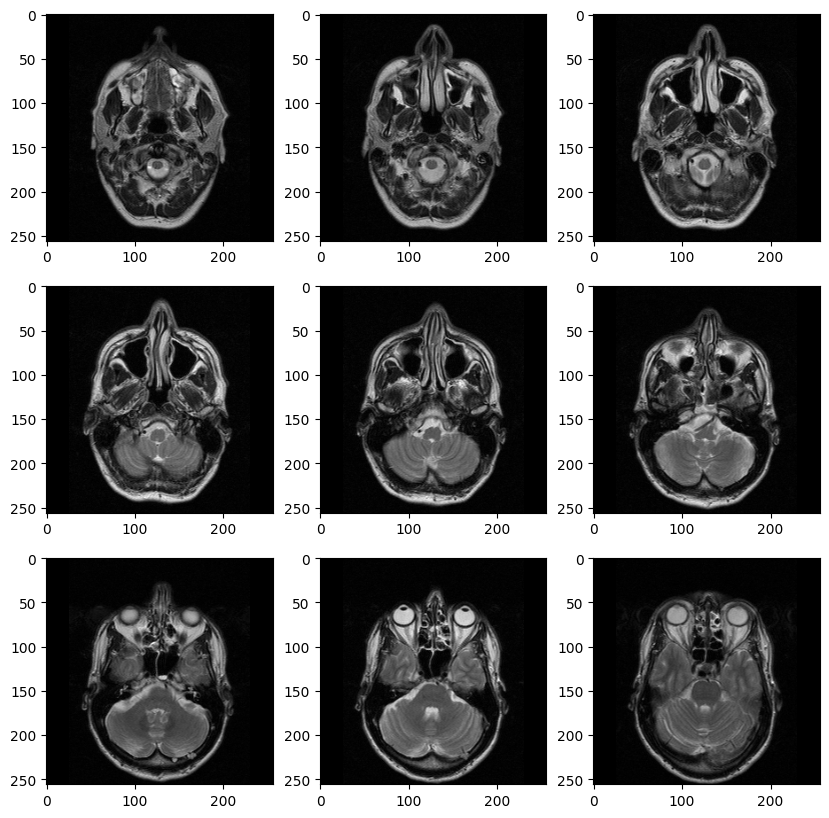

In [25]:
fig, axis = plt.subplots(3, 3, figsize=(10, 10))

slice_counter = 0
for i in range(3):
    for j in range(3):
        axis[i][j].imshow(head_mri[slice_counter], cmap="gray")
        slice_counter+=1
